In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y, centers = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3, return_centers=True)

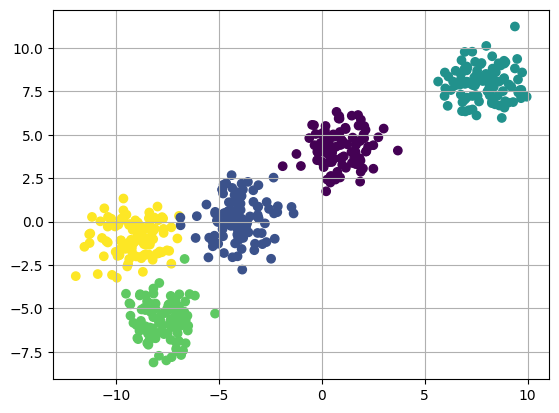

In [3]:
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [4]:
centers

array([[ 1.01595805,  4.16295645],
       [-4.18190522,  0.2165521 ],
       [ 7.85893909,  7.92586178],
       [-7.48829379, -5.85514244],
       [-8.97065593, -1.18380313]])

In [5]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([100, 100, 100, 100, 100], dtype=int64))

In [26]:
k = 5
color = ["green", 'blue', 'yellow', 'orange', 'red']
clusters = {}
for i in range(k):
    center = 10 * (2 * np.random.random((X.shape[1],)) - 1) 
    points = []
    cluster = {
        'center': center,
        'points': points,
        'color': color[i]
    }
    clusters[i] = cluster

In [27]:
clusters

{0: {'center': array([-0.04545273,  6.99592633]),
  'points': [],
  'color': 'green'},
 1: {'center': array([6.97322394, 2.13974155]), 'points': [], 'color': 'blue'},
 2: {'center': array([-4.40869484,  1.40538261]),
  'points': [],
  'color': 'yellow'},
 3: {'center': array([-1.59916871,  3.98533587]),
  'points': [],
  'color': 'orange'},
 4: {'center': array([4.09159162, 3.05975364]), 'points': [], 'color': 'red'}}

In [28]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

In [29]:
def assignPointToCluster(clusters): # Expectation Maximization Algorithm, E-step
    for ix in range(X.shape[0]):
        curr = X[ix]
        dist = [] 
        for kx in range(k):
            d = distance(curr, clusters[kx]['center'])
            dist.append(d)
        cluster_choosen = np.argmin(dist)
        clusters[cluster_choosen]['points'].append(curr)
    return clusters

In [30]:
import copy

In [31]:
clust = copy.deepcopy(clusters)
new_clusters = assignPointToCluster(clust)

In [32]:
for i in new_clusters.keys():
    print(len(new_clusters[i]['points']))

24
72
299
51
54


In [33]:
clusters = new_clusters
clusters

{0: {'center': array([-0.04545273,  6.99592633]),
  'points': [array([-0.37980545,  5.55461936]),
   array([0.8614512 , 5.93258376]),
   array([2.12414555, 5.28234711]),
   array([1.01840221, 4.58759217]),
   array([0.87533802, 5.16004482]),
   array([2.06410556, 5.49669427]),
   array([0.81854337, 5.93760148]),
   array([-0.47070002,  5.57158341]),
   array([0.84786795, 6.07223326]),
   array([1.76101432, 6.13906724]),
   array([0.71575198, 6.32110579]),
   array([0.15364956, 5.23464038]),
   array([1.4997464 , 4.83917285]),
   array([0.59976004, 4.88761411]),
   array([1.45390466, 6.10193491]),
   array([1.24170832, 4.44999162]),
   array([1.89727609, 5.87252952]),
   array([0.1817182 , 5.50794891]),
   array([1.16102127, 5.33083874]),
   array([1.78492321, 5.5291993 ]),
   array([0.93621711, 4.72744197]),
   array([0.55869726, 5.02224046]),
   array([1.14396587, 5.40457297]),
   array([0.99733034, 4.64648524])],
  'color': 'green'},
 1: {'center': array([6.97322394, 2.13974155]),
  

In [34]:
def plotClusters(clusters):
    for ki in range(k):
        pts = clusters[ki]['points']
        pts = np.asarray(pts)
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c=clusters[ki]['color'])
            pass
        except:
            pass
    for ki in range(k):
        uk = clusters[ki]['center']
        plt.scatter(uk[0], uk[1], color='black', marker="*")
    plt.show()

In [35]:
def updateCluster(): # M-step, we update every cluster center according to the mean of the points init.
    for ki in range(k):
        pts = clusters[ki]['points']
        if len(pts) > 0:
            u = np.mean(pts, axis=0)
            clusters[ki]['center'] = u
            clusters[ki]['points'] = []

In [36]:
clusters

{0: {'center': array([-0.04545273,  6.99592633]),
  'points': [array([-0.37980545,  5.55461936]),
   array([0.8614512 , 5.93258376]),
   array([2.12414555, 5.28234711]),
   array([1.01840221, 4.58759217]),
   array([0.87533802, 5.16004482]),
   array([2.06410556, 5.49669427]),
   array([0.81854337, 5.93760148]),
   array([-0.47070002,  5.57158341]),
   array([0.84786795, 6.07223326]),
   array([1.76101432, 6.13906724]),
   array([0.71575198, 6.32110579]),
   array([0.15364956, 5.23464038]),
   array([1.4997464 , 4.83917285]),
   array([0.59976004, 4.88761411]),
   array([1.45390466, 6.10193491]),
   array([1.24170832, 4.44999162]),
   array([1.89727609, 5.87252952]),
   array([0.1817182 , 5.50794891]),
   array([1.16102127, 5.33083874]),
   array([1.78492321, 5.5291993 ]),
   array([0.93621711, 4.72744197]),
   array([0.55869726, 5.02224046]),
   array([1.14396587, 5.40457297]),
   array([0.99733034, 4.64648524])],
  'color': 'green'},
 1: {'center': array([6.97322394, 2.13974155]),
  

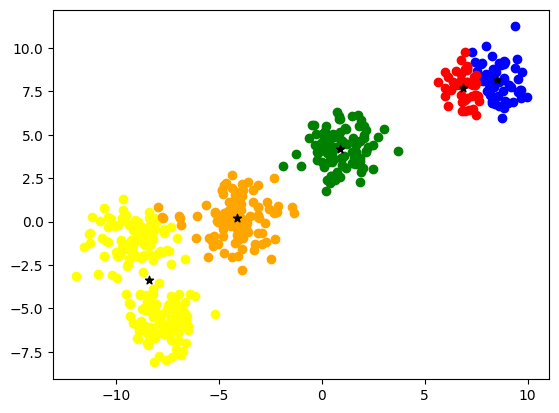

In [43]:
clusters = assignPointToCluster(clusters)
plotClusters(clusters)
updateCluster()